In [1]:
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib notebook

## FEMs
Fiber: 500m

PAM: 378, EAST input, attenuation: east = 9, north = 4

SNAP: C000091, E6 input

In [2]:
FEMS = ["12", "032", "320", "348"]
dt = np.dtype(np.int32).newbyteorder(">")

def byte2int(fem_id):
    n_path = f"data/fem{fem_id}_north.npz"
    e_path = f"data/fem{fem_id}_east.npz"
    d_north = np.frombuffer(np.load(n_path)["3"], dtype=dt).astype(float)
    d_east = np.frombuffer(np.load(e_path)["3"], dtype=dt).astype(float)
    return np.array([d_north, d_east])

data = {}
for fem_id in FEMS:
    d = byte2int(fem_id)
    data[fem_id] = d
    
east_12_max = data["12"][1][1:].max()
    
peak_normalized_data = {}
for fem_id in data:
    d = data[fem_id]
    peak_normalized_data[fem_id] = d / np.max(d[:, 1:], axis=1, keepdims=True)
    
east_12_normalized = peak_normalized_data["12"][1]

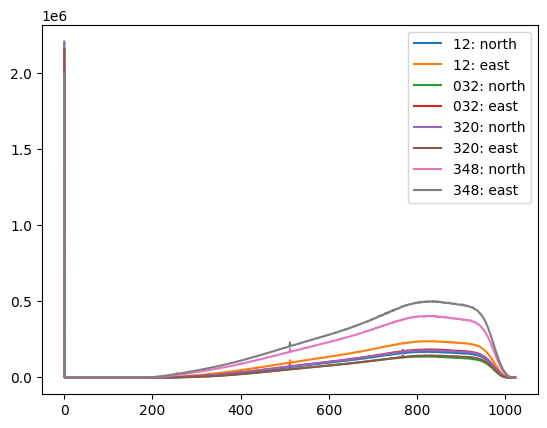

In [3]:
plt.figure()
for fem_id in FEMS:
    d = data[fem_id]
    plt.plot(d[0], label=f"{fem_id}: north")
    plt.plot(d[1], label=f"{fem_id}: east")
plt.legend()
plt.show()

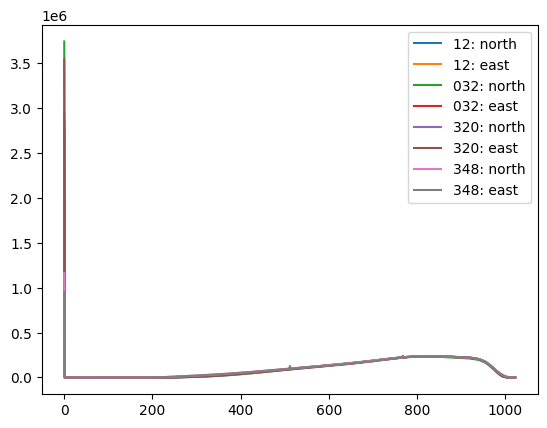

In [4]:
plt.figure()
for fem_id in FEMS:
    d = peak_normalized_data[fem_id]
    plt.plot(d[0] * east_12_max, label=f"{fem_id}: north")
    plt.plot(d[1] * east_12_max, label=f"{fem_id}: east")
plt.legend()
#plt.ylim(0, 1e6)
plt.show()

/tmp/ipykernel_39803/567449508.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(d[0] / east_12_normalized, label=f"{fem_id}: north")
/tmp/ipykernel_39803/567449508.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(d[1] / east_12_normalized, label=f"{fem_id}: east")
/tmp/ipykernel_39803/567449508.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(d[0] / east_12_normalized, label=f"{fem_id}: north")
/tmp/ipykernel_39803/567449508.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(d[1] / east_12_normalized, label=f"{fem_id}: east")


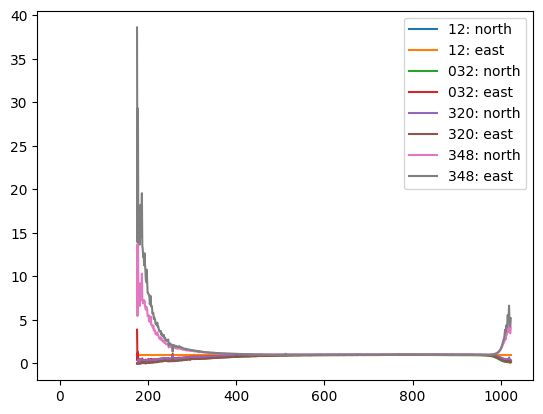

In [5]:
plt.figure()
for fem_id in FEMS:
    d = peak_normalized_data[fem_id]
    plt.plot(d[0] / east_12_normalized, label=f"{fem_id}: north")
    plt.plot(d[1] / east_12_normalized, label=f"{fem_id}: east")
plt.legend()
plt.show()

/tmp/ipykernel_39803/1403772209.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d[0]) / d[0][1:], label=f"{fem_id}: north")
/tmp/ipykernel_39803/1403772209.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d[0]) / d[0][1:], label=f"{fem_id}: north")
/tmp/ipykernel_39803/1403772209.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d[1]) / d[1][1:], label=f"{fem_id}: east")
/tmp/ipykernel_39803/1403772209.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d[1]) / d[1][1:], label=f"{fem_id}: east")


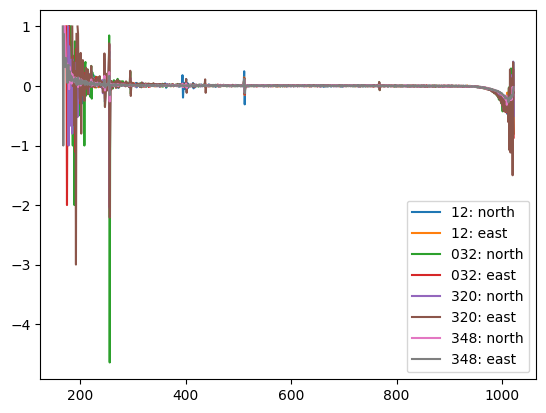

In [6]:
plt.figure()
for fem_id in FEMS:
    d = data[fem_id]
    plt.plot(np.diff(d[0]) / d[0][1:], label=f"{fem_id}: north")
    plt.plot(np.diff(d[1]) / d[1][1:], label=f"{fem_id}: east")
plt.legend()
plt.show()

## PAMs

Fiber: 500m

FEM: 032, EAST input

PAM attenuation: east = 8, north = 8

SNAP: C000091, E6 input

#### Note: PAM 292 i2c is not working, attenuation is unknown!

In [ ]:
PAMS = ["292", "376", "378"]
dt = np.dtype(np.int32).newbyteorder(">")

def byte2int(pam_id):
    n_path = f"data/pam{pam_id}_north.npz"
    e_path = f"data/pam{pam_id}_east.npz"
    d_north = np.frombuffer(np.load(n_path)["3"], dtype=dt).astype(float)
    if pam_id == "376":
        d_east = np.zeros_like(d_north)
    else:
        d_east = np.frombuffer(np.load(e_path)["3"], dtype=dt).astype(float)
    return np.array([d_north, d_east])

for pam_id in PAMS:
    d = byte2int(pam_id)
    data[pam_id] = d
    
east_378_max = data["378"][1][1:].max()
    

for pam_id in data:
    d = data[fem_id]
    peak_normalized_data[fem_id] = d / np.max(d[:, 1:], axis=1, keepdims=True)
    
east_12_normalized = peak_normalized_data["12"][1]